In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

## Importing Dataset
----
Training the model from the dataset _train.csv_

Predicting the Values in the dataset _test.csv_

In [3]:
data = pd.read_csv("data/train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### The Regrssion Model will be predicting sale price based on 3 parameters 
- No. of Bedrooms
- No. of Bathrooms
- Total Area (Sq.Foot)

Therefore, Filtering data to the required dataset for the model 

In [4]:
bedrooms, bathroom, area = data['BedroomAbvGr'], data['FullBath'], data['LotArea']
salePrice = data['SalePrice']

modelData = pd.DataFrame(
    {
        "Bedrooms": bedrooms,
        "Bathrooms": bathroom,
        "Area": area,
        "SalePrice": salePrice
    }
)

modelData

,Bedrooms,Bathrooms,Area,SalePrice
0,3,2,8450,208500
1,3,2,9600,181500
2,3,2,11250,223500
3,3,1,9550,140000
4,4,2,14260,250000
...,...,...,...,...
1455,3,2,7917,175000
1456,3,2,13175,210000
1457,4,2,9042,266500
1458,2,1,9717,142125


#### Ploting individual Graphs for each column with respect to _SalePrice_

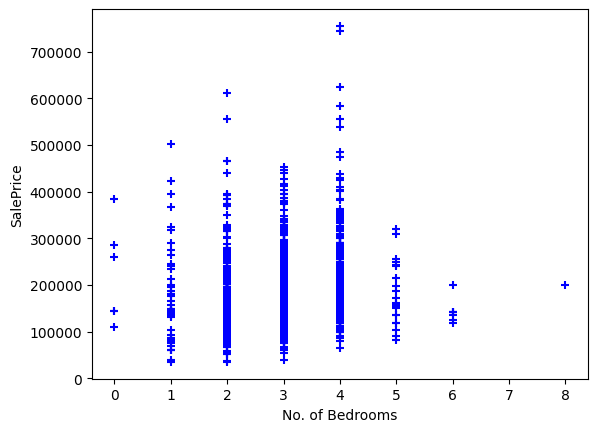

In [6]:
plt.xlabel("No. of Bedrooms")
plt.ylabel("SalePrice")
plt.scatter(bedrooms, salePrice, color="blue", marker="+")

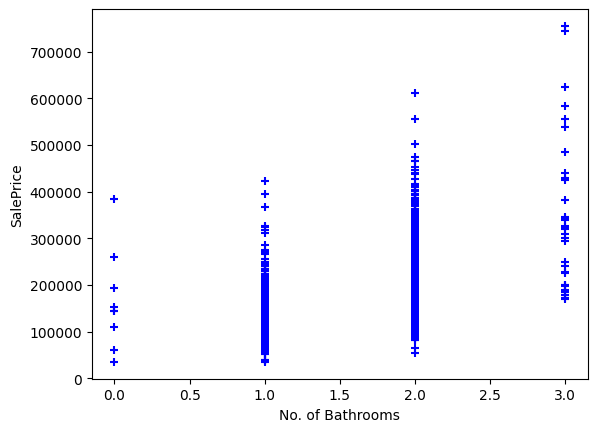

In [8]:
plt.xlabel("No. of Bathrooms")
plt.ylabel("SalePrice")
plt.scatter(bathroom, salePrice, color="blue", marker="+")

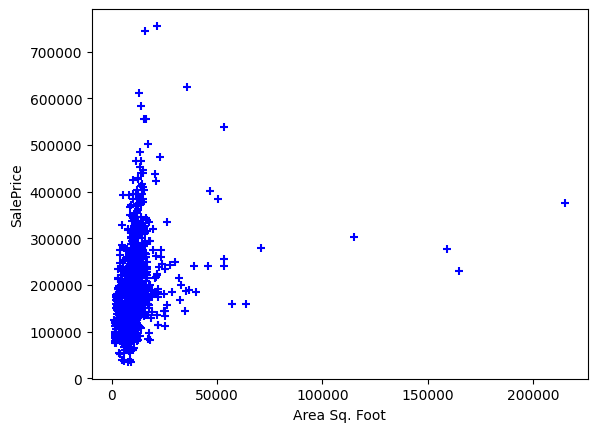

In [9]:
plt.xlabel("Area Sq. Foot")
plt.ylabel("SalePrice")
plt.scatter(area, salePrice, color="blue", marker="+")

#### Building the Regression Model from scratch
----
The Basic formula for linear regression is (_Y_ = _B0_ + _B1_ * _X_) which is the slope intercept formula

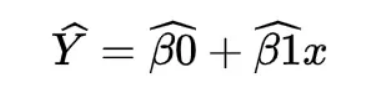

what we are trying to predict is _Y_ and what we have is _X_ 

The two constant _B0_ and _B1_ are the values we calculate based on our graphs each point

we first start at bottom at _B0_ and _B1_ Equal to 0 the we slowly increase the slop of our line using this formula

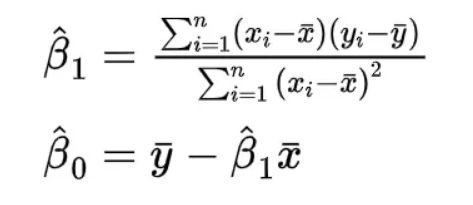

the formula is implemented below in the function _create_model_


In [11]:

def get_predictions(model: dict, X):
    """ 
    model: dict containg the two constants beta0 and beta1 
    x: np.array of floats containg a vector of values of independent variables

    returns an np.array of floats with values gained from the model and x
    """

    return model['beta0'] + model['beta1'] * X

def create_model(x,y):
    """
    x: np.array of floats with x intercepts 
    y: np.array of floats with y intercepts
    """

    x_bar = np.average(x)
    y_bar = np.average(y)

    top = np.sum((x-x_bar)*(y-y_bar))
    bot = np.sum((x-x_bar)**2)
    beta1 = top/bot

    beta0 = y_bar - beta1*x_bar
    model = {"beta0": beta0, "beta1": beta1}

    return model

## Ploting the linear regrssion line on the individual graphs with respect to sale price

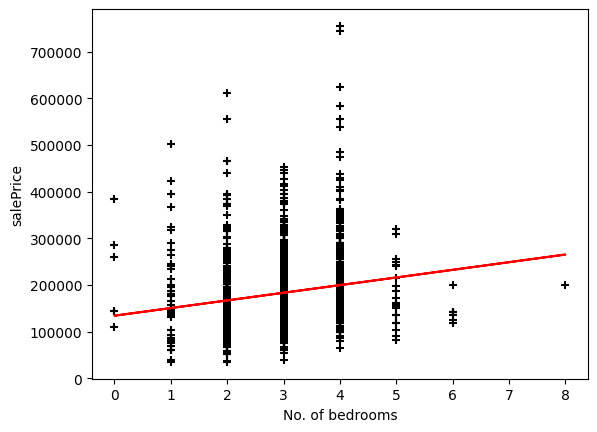

In [14]:
model1 = create_model(bedrooms, salePrice)
model2 = create_model(bathroom, salePrice)
model3 = create_model(area, salePrice)

plt.xlabel("No. of bedrooms")
plt.ylabel("salePrice")
plt.scatter(bedrooms, salePrice, color="black", marker="+")
plt.plot(bedrooms, get_predictions(model1, bedrooms), color="red")


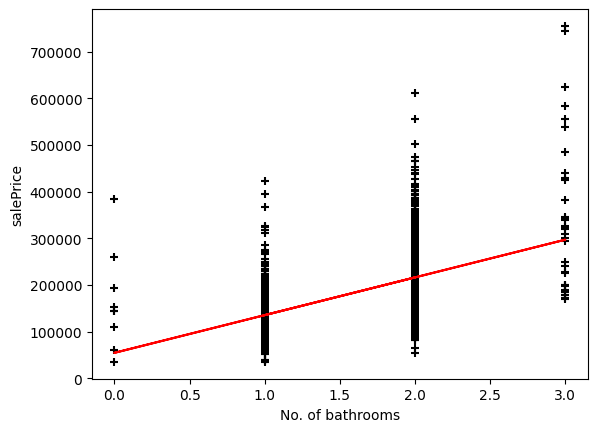

In [15]:
plt.xlabel("No. of bathrooms")
plt.ylabel("salePrice")
plt.scatter(bathroom, salePrice, color="black", marker="+")
plt.plot(bathroom, get_predictions(model2, bathroom), color="red")

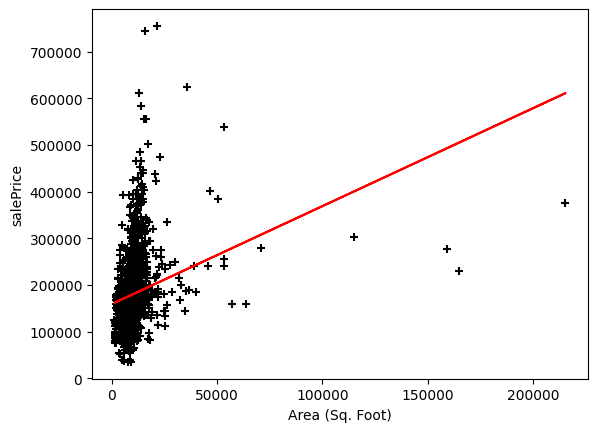

In [16]:
plt.xlabel("Area (Sq. Foot)")
plt.ylabel("salePrice")
plt.scatter(area, salePrice, color="black", marker="+")
plt.plot(area, get_predictions(model3, area), color="red")

#### Creating Model of Multivariable Linear Regression
----
Unlike in single variable linear regression where we predict the value of _Y_ with respect to _X_, in **multivariable linear regression** we predict the value of _Y_ based on many variables like predicting the _saleprice_ based on _bathrooms_, _bedrooms_ and _area_.

The formula to calculate beta remains the same but this time we are not limited by only 2 variables we can have **N** variables 
```
def get_prediction(model, x)
```
> This function will return a np.array of values which are calculated by the same previous formula but since we are using multivariables this function takes model as a np.array of shape (**p**, **N**) with each rows  as _B0_, _B1_, _B2_, ..., _Bn_

```
def create_multi_model(X, Y)
```
> This function is used to generate the matrix with **p** rows and **N** columns 


In [20]:
def get_prediction(model, x):
    """
    model: np.array of our p constants and intercept
    x: np.array of all independent values
    returns a np.array vector 
    """
    (p, n_minus_one) = x.shape

    n = n_minus_one + 1

    new_x = np.ones(shape=(p,n))
    new_x[:, 1:] = x
    return np.dot(new_x, model) 

def create_multi_model(X, Y):
    """
    Creates a Model based on the given data 
    X: np.array of independent values 
    Y: np.array of observed values 
    """

    (n, p_minus_one) = X.shape

    p = p_minus_one + 1

    new_x = np.ones(shape=(n,p))
    new_x[:, 1:] = X
    return np.dot(np.dot(inv(np.dot(new_x.T, new_x)), new_x.T), Y)

#### Predicting the sale price of houses


In [29]:
modelData_np = modelData.to_numpy()
X_train, Y_train = modelData_np[:, :3], modelData_np[:, -1]
multi_model = create_multi_model(X_train, Y_train)
prediction = get_prediction(multi_model, X_train)
modelData['our prediction'] = prediction.astype(int)
modelData

,Bedrooms,Bathrooms,Area,SalePrice,our prediction
0,3,2,8450,208500,211764
1,3,2,9600,181500,213600
2,3,2,11250,223500,216235
3,3,1,9550,140000,133285
4,4,2,14260,250000,215402
...,...,...,...,...,...
1455,3,2,7917,175000,210912
1456,3,2,13175,210000,219309
1457,4,2,9042,266500,207068
1458,2,1,9717,142125,139192


#### Checking the relation of our prediction to the actual sale price


In [33]:
score = modelData.corr()['SalePrice']['our prediction'] * 100
score 

59.59526753056098

## Predicting the SalePrice for our test data now

In [34]:
test = pd.read_csv('data/test.csv')
test
 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [35]:
testData = pd.DataFrame({
    "Bedrooms": test['BedroomAbvGr'],
    "Bathrooms": test['FullBath'],
    "Area": test['LotArea']
})
testData

,Bedrooms,Bathrooms,Area
0,2,1,11622
1,3,1,14267
2,3,2,13830
3,3,2,9978
4,2,2,5005
...,...,...,...
1454,3,1,1936
1455,3,1,1894
1456,4,1,20000
1457,3,1,10441


In [36]:
testData_np = testData.to_numpy()
x_data = testData_np[:, :]
finalPrediction = get_prediction(multi_model, x_data)
testData['Predicted Sale Price'] = finalPrediction.astype(int)
testData

,Bedrooms,Bathrooms,Area,Predicted Sale Price
0,2,1,11622,142234
1,3,1,14267,140818
2,3,2,13830,220355
3,3,2,9978,214204
4,2,2,5005,211902
...,...,...,...,...
1454,3,1,1936,121125
1455,3,1,1894,121058
1456,4,1,20000,144333
1457,3,1,10441,134708


### Error Estimation
----
Errors occur in any model while we are predicting any values there are two ways of predicting error mean squared and mean absolute

**Mean Squared Error**
> Gives the Square value of the prediction minus actual value. This way the value is always positive then dividing it by the total number of values to get mean value

**Mean Absolute Error**
> taking the aboslute value of prediction minus actual value then taking mean of it. This is used more compared to Mean Squared Error

In [37]:
def mean_squared_error(y, y_prediction):
    """
    Gives the mean squared value of the predictions and the actual point 
    y: actual point
    y_prediction: predicted point by model
    """
    n = len(y)
    return np.sum(np.square(y - y_prediction)) / n

def mean_absolute_error(y, y_prediction):
    """
    Gives the mean absolute value of the predictions and the actual point 
    y: np.array of floats of actual point
    y_prediction: np.array of floats of predicted point by model
    """
    n = len(y)
    return np.sum(np.abs(y - y_prediction)) / n

In [39]:
mse = mean_squared_error(modelData['SalePrice'], prediction)
mae = mean_absolute_error(modelData['SalePrice'], prediction)

print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}")


Mean Squared Error: 4066873836.623575
Mean Absolute Error: 43468.4035765144


#### Comparing Our Prediction with SciKit-Learn predictions


In [40]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression().fit(X_train, Y_train)
sk_prediction = sk_model.predict(X_train)
modelData['Scikit-learn prediction'] = sk_prediction.astype(int)
modelData

,Bedrooms,Bathrooms,Area,SalePrice,our prediction,Scikit-learn prediction
0,3,2,8450,208500,211764,211764
1,3,2,9600,181500,213600,213600
2,3,2,11250,223500,216235,216235
3,3,1,9550,140000,133285,133285
4,4,2,14260,250000,215402,215402
...,...,...,...,...,...,...
1455,3,2,7917,175000,210912,210912
1456,3,2,13175,210000,219309,219309
1457,4,2,9042,266500,207068,207068
1458,2,1,9717,142125,139192,139192
